In [1]:
import requests
import json
import prettytable
import os
import pandas as pd
import dtale
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

## BLS_key

In [2]:
bls_key = os.environ.get('bls_key')

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(bls_key)

## Arts, Entertainment, And Recreation Industry: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 2015 - 2021

In [3]:
# Series stored as a dictionary #CEU-Industry code-03
series_dict = {
    'CEU7071000003': 'AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES(Arts, Entertainment, And Recreation)'} 

# Start year and end year
dates = ('2015', '2021')

In [4]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [5]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,"AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES(Arts, Entertainment, And Recreation)"
2021-06-01,23.06
2021-07-01,22.62
2021-08-01,23.27
2021-09-01,24.80
2021-10-01,25.13


<AxesSubplot:title={'center':'Arts, Entertainment, And Recreation: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 15-21'}>

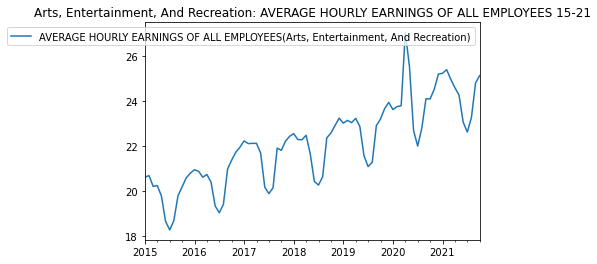

In [6]:
# Simple line plot of the data
df.plot(title='Arts, Entertainment, And Recreation: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 15-21')

## Arts, Entertainment, And Recreation Industry: All employees, thousands 2019 - 2021

In [7]:
# Series stored as a dictionary #CEU-Industry code-01 (Employment Survey)
series_dict = {
    'CEU7071000001': 'All employees, thousands'} 

# Start year and end year
dates = ('2019', '2021')

In [8]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']


In [9]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,"All employees, thousands"
2021-07-01,2390.8
2021-08-01,2384.8
2021-09-01,2212.3
2021-10-01,2164.2
2021-11-01,2095.9


<AxesSubplot:title={'center':'Arts, Entertainment, And Recreation: All employees, thousands'}>

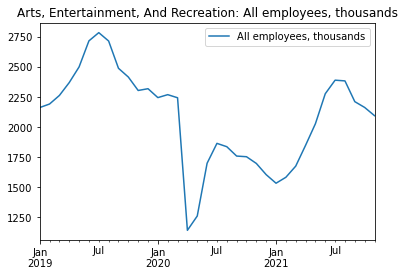

In [10]:
# Simple line plot of the data
df.plot(title='Arts, Entertainment, And Recreation: All employees, thousands')